In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from matplotlib.colors import ListedColormap

## Data / Goal
The goal is to predict which customers will buy a SUV, so a business can target social media adverts accordingly. The dataset has 400 observations. The independent variables are age and salary. The dependent variable is binary, with 1 = bought SUV, and 0 = did not buy SUV.

In [9]:
dataset = pd.read_csv('data\Social_Network_Ads.csv')
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

## Exploratory Data Analysis
Correlation between age and salary is low, although very young people tend not to earn very high salaries. It also appears young people tend not to buy SUV's (probably because they are less likely to have offspring). There does not appear to be many outliers.

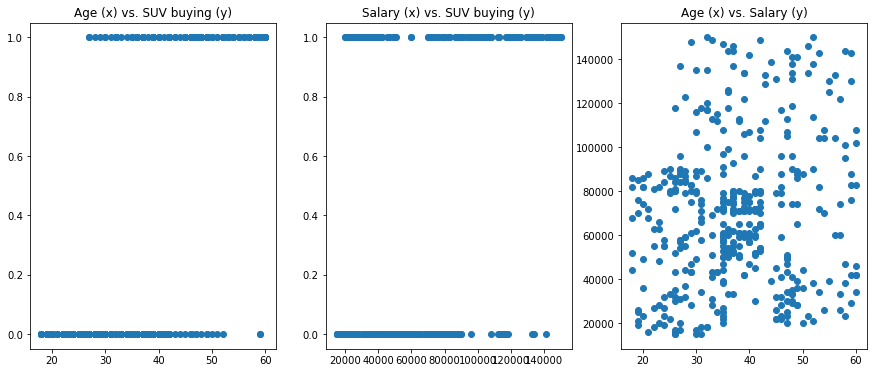

In [10]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize = (15,6))
ax1.scatter(X[:,0], y)
ax1.set_title("Age (x) vs. SUV buying (y)")
ax2.scatter(X[:,1], y)
ax2.set_title("Salary (x) vs. SUV buying (y)")
ax3.scatter(X[:,0],X[:,1])
ax3.set_title("Age (x) vs. Salary (y)")
plt.tight_layout
plt.show()

## Ada Boost
**Preprocessing**: No preprocessing is applied. The dataset is split into 75% training and 25% test.

**Approach**: Ada Boost also builds a series of weak learners, with each weak learner trying to improve upon previous mistakes. Each data point is given a weight, with the misclassified data points given higher weights, and correctly classified data points given lower weights. The data points and weights are then used to build new weak learners. The weak learners are aggregated when a prediction needs to be made. Decision trees (or decision stumps) are commonly used as weak learners.

**Advantages/Disadvantages**: The advantages similar to decision trees (highly flexible model, limited preprocessing, very little assumptions), however we have reduced variance, reduced noise, and reduced the chance of over-fitting (whilst keeping bias the same). It is easy to implement, works well with a wide range of classifiers, and no parameters to adjust. Ada Boost is sensitive to noise and outliers because it works hard to correctly classify misclassified data points.

**Results**: THe accuracy of the model is 91%.

In [11]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.25, random_state=0)

pipeline = Pipeline([('clf', AdaBoostClassifier())])
model = pipeline.fit(X_train, y_train)
predictions = model.predict(X_test)

cm = confusion_matrix(y_test,predictions)
print(cm)
accuracy_score(y_test,predictions)


[[64  4]
 [ 5 27]]


0.91

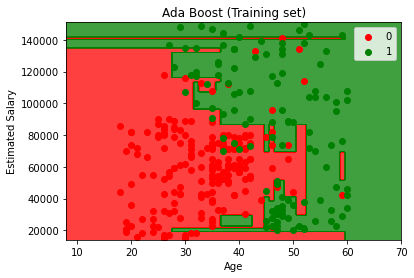

In [12]:
X_set = X_train
y_set = y_train
X1, X2 = np.meshgrid(np.linspace(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, num=200),
                     np.linspace(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, num=200))
plt.contourf(X1, X2, model.predict((np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], color = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Ada Boost (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

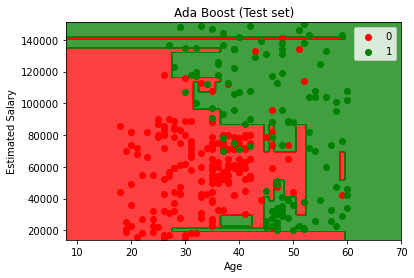

In [13]:
X_set = X_train
y_set = y_train
X1, X2 = np.meshgrid(np.linspace(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, num=200),
                     np.linspace(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, num=200))
plt.contourf(X1, X2, model.predict((np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], color = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Ada Boost (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()